# FE Homework 4
**FBA Quant 이의형**

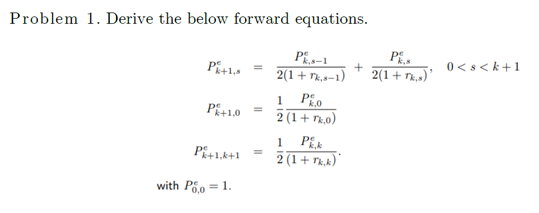

현재가격 P_{0,0}을 1이라 놓으면 다음 기간의 가격은 현재가격의 0.5(위험중립확률)에 이자율을 곱해서 결정된다.

이전 기간 격자의 가격이 하나뿐이면 그 가격만 적용 가능하므로 항이 하나이고, 두 개의 가격이 존재하면 각각의 가격을 더해 결정한다.

---

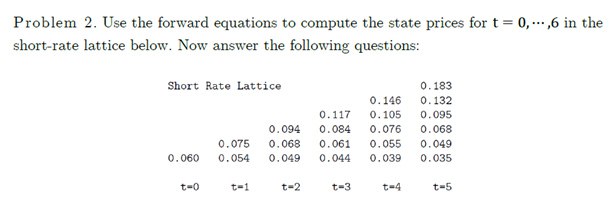

In [1]:
import pandas as pd
import numpy as np

u = 1.25
d = 0.9
q = 0.5
initial_rate = 0.06 
period = 6

df = pd.DataFrame(np.diag([initial_rate * d**i for i in range(period)]))
for i in range(period):
    for j in range(period):
        if j > i:
            df.iloc[i,j] = df.iloc[i,j-1]*u
df

,0,1,2,3,4,5
0,0.06,0.075,0.09375,0.117188,0.146484,0.183105
1,0.00,0.054,0.06750,0.084375,0.105469,0.131836
2,0.00,0.000,0.04860,0.060750,0.075938,0.094922
3,0.00,0.000,0.00000,0.043740,0.054675,0.068344
4,0.00,0.000,0.00000,0.000000,0.039366,0.049208
5,0.00,0.000,0.00000,0.000000,0.000000,0.035429


**(a) Compute the price of a 4-period zero-coupon bond with face value 100 that expires at t = 4.**

In [2]:
face_value = 100
t= 4

zero_pv = pd.DataFrame().reindex_like(df.iloc[:5,:5])
zero_pv.iloc[:,-1] = face_value

for i in range(t-1, -1, -1):
    for j in range(t):
        if i >= j:
            p_u = zero_pv.iloc[j,i+1]
            p_d = zero_pv.iloc[j+1,i+1]
            pv = (q*p_u + (1-q)*p_d)
            zero_pv.iloc[j,i] = pv / (1+df.iloc[j,i])

print(f'zero-coupon bond의 현재가치는 {zero_pv.iloc[0,0]:.2f}$이다.')
zero_pv

zero-coupon bond의 현재가치는 77.22$이다.


,0,1,2,3,4
0,77.21774,79.268001,83.076347,89.510490,100
1,NaN,84.433608,87.349855,92.219020,100
2,NaN,NaN,90.636192,94.272920,100
3,NaN,NaN,NaN,95.809301,100
4,NaN,NaN,NaN,NaN,100


**(b) Compute the price of a European call option on the zero-coupon bond of (a) that expires at t=2 and has strike $84**

In [3]:
t= 2
s = 84

option_pv = pd.DataFrame().reindex_like(df.iloc[:t+1,:t+1])
option_pv.iloc[:,-1] = zero_pv.iloc[:,2].apply(lambda x: x - 84 if x > 84 else 0)

for i in range(t-1, -1, -1):
    for j in range(t):
        if i >= j:
            p_u = option_pv.iloc[j,i+1]
            p_d = option_pv.iloc[j+1,i+1]
            pv = (q*p_u + (1-q)*p_d)
            option_pv.iloc[j,i] = pv / (1+df.iloc[j,i])

print(f'European Call Option의 현재가치는 {option_pv.iloc[0,0]:.2f}$이다.')
option_pv

European Call Option의 현재가치는 2.97$이다.


,0,1,2
0,2.969474,1.558072,0.000000
1,NaN,4.737214,3.349855
2,NaN,NaN,6.636192


**(c) Compute the price of a forward contract for delivery at t = 4 of a 2-year 10% coupon-bearing bond where we assume that delivery takes place just after a coupon has been paid.**

In [4]:
face_value = 100
c = 10
t= 5

forward_pv = pd.DataFrame(np.identity(7))
forward_pv.iloc[:,-1] = face_value + c

for i in range(t, -1, -1):
    for j in range(t+1):
        if i >= j:
            p_u = forward_pv.iloc[j,i+1]
            p_d = forward_pv.iloc[j+1,i+1]
            pv = (q*p_u + (1-q)*p_d)
            if i == 5:
                forward_pv.iloc[j,i] = (pv / (1+df.iloc[j,i])) + c
            else:
                forward_pv.iloc[j,i] = pv / (1+df.iloc[j,i])

print(f'forward contract의 공정 가격은 {forward_pv.iloc[0,0]/0.7722:.2f} $이다.')
forward_pv

forward contract의 공정 가격은 103.38 $이다.


,0,1,2,3,4,5,6
0,79.826963,79.991093,81.529355,85.078926,91.655362,102.975650,110
1,0.000000,89.242069,90.451494,93.266538,98.442864,107.187230,110
2,0.000000,0.000000,97.670786,99.847402,103.828941,110.463789,110
3,0.000000,0.000000,0.000000,104.987771,107.997321,112.963115,110
4,0.000000,0.000000,0.000000,0.000000,111.162551,114.841035,110
5,0.000000,0.000000,0.000000,0.000000,0.000000,116.236118,110
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110


**(d) Compute the price of a caplet that expires at t = 6 with strike = 2%.**

In [5]:
strike_rate = 0.02
t= 5

caplet_pv = pd.DataFrame().reindex_like(df)
caplet_pv.iloc[:,-1] = (df.iloc[:,-1] - strike_rate)/(1+df.iloc[:,-1])

for i in range(t-1, -1, -1):
    for j in range(t):
        if i >= j:
            p_u = caplet_pv.iloc[j,i+1]
            p_d = caplet_pv.iloc[j+1,i+1]
            pv = (q*p_u + (1-q)*p_d)
            caplet_pv.iloc[j,i] = pv / (1+df.iloc[j,i])

print(f'caplet의 현재가치는 {zero_pv.iloc[0,0]:.3f}이다.')
caplet_pv

caplet의 현재가치는 77.218이다.


,0,1,2,3,4,5
0,0.042045,0.051503,0.063672,0.080048,0.103216,0.137862
1,NaN,0.037633,0.047058,0.059236,0.075640,0.098809
2,NaN,NaN,0.032272,0.041234,0.052827,0.068427
3,NaN,NaN,NaN,0.026448,0.034650,0.045251
4,NaN,NaN,NaN,NaN,0.020560,0.027838
5,NaN,NaN,NaN,NaN,NaN,0.014901


---

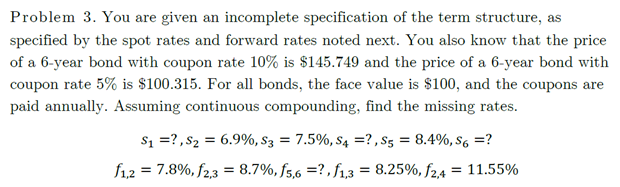

$s_1 = 0.06000$  
$s_4 = 0.09225$  
$s_6 = 0.10517$  
$f_{5,6} = 0.21103$  

In [6]:
s2 = 0.069
s3 = 0.075
s5 = 0.084
f12 = 0.078
f23 = 0.087
f13 = 0.0825
f24 = 0.1155

#### a) $s_1$

$$s_2t_2 = s_1t_1 + f_{1,2}(t_2 - t_1)$$  
$$s_1 = \frac {s_2t_2 - f_{1,2}(t_2 - t_1)} {t_1}$$

In [7]:
# s1
s1 = (s2*2 - f12*(2-1))/1
s1

0.06000000000000001

#### b) $s_4$

$$s_4t_4 = s_2t_2 + f_{2,4}(t_4 - t_2)$$  
$$s_4 = \frac {s_2t_2 + f_{2,4}(t_4 - t_2)} {t_4}$$

In [8]:
# s4
s4 = (s2*2 + f24*(4-2))/4
s4

0.09225

#### c) $s_6$

$$P_{c=10} = \sum^6_{k=1} \frac {10} {(1+r)^k} + \frac {100} {(1+r)^6} = 145.749$$   
$$P_{c=5} = \sum^6_{k=1} \frac {5} {(1+r)^k} + \frac {100} {(1+r)^6} = 100.315$$  

$$2*P_{c=5} - P_{c=10} = \frac {100} {(1+r)^6} = 200.630 - 145.749 = 54.881$$  
$$r = (\frac {100} {54.881})^{\frac {1} {6}} - 1 = s_6$$  

In [9]:
s6 = (100/54.881)**(1/6) - 1
s6

0.10517146719139836

#### d) $f_{5,6}$

$$s_6t_6 = s_5t_5 + f_{5,6}(t_6-t_5)$$  
$$f_{5,6} = \frac {s_6t_6 - s_5t_5} {t_6 - t_5}$$

In [10]:
f56 = (s6*6 - s5*5)/(6-5)
f56

0.21102880314839012

---

<div>
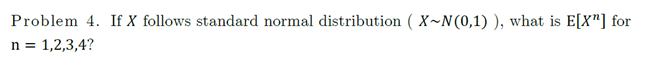
</div>

$$M(t) = E[e^{xt}] = \int_\infty^{-\infty} e^{xt} \frac {1} {\sqrt {2\pi}} e^{-x^2/2}dx = e^{t^2/2} \int_\infty^{-\infty} \frac {1} {\sqrt {2\pi}} e^{-(x-t)^2/2}dx = e^{t^2/2}$$

$$M'(t) = te^{t^2/2} \to M'(0) = 0$$  
$$M^{(2)}(t) = e^{t^2/2} + t^2 e^{t^2/2} \to M^{(2)}(0) = 1$$  
$$M^{(3)}(t) = te^{t^2/2} + 2te^{t^2/2} + t^3e^{t^2/2} \to M^{(3)}(0) = 0$$  
$$M^{(4)}(t) = 3e^{t^2/2} + 3t^2e^{t^2/2} + 3t^2e^{t^2/2} + t^4e^{t^2/2} \to M^{(4)}(0) = 3$$  

---

### Problem 5.

Solve the corresponding leetcode problem below and register the solution on GitHub.

Given two integer arrays nums1 and nums2, return an array of their intersection.  
Each element in the result must appear as many times as it shows in both arrays and you may return the result in any order.

In [11]:
class Solution5(object):
    def intersect(self, nums1, nums2):
        """
        :type nums1: List[int]
        :type nums2: List[int]
        :rtype: List[int]
        """
        answer = []
        for n1 in nums1:
            if n1 in nums2:
                answer.append(n1)
                nums2.remove(n1)
        return answer

In [12]:
nums1 = [4,9,5]
nums2 = [9,4,9,8,4]

Solution5().intersect(nums1, nums2)

[4, 9]

---

### Problem 6.

Solve the corresponding leetcode problem below and register the solution on GitHub.

Given two strings s and t, return true if t is an anagram of s, and false otherwise.  
An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

In [13]:
class Solution6(object):
    def isAnagram(self, s, t):
        """
        :type s: str
        :type t: str
        :rtype: bool
        """
        return sorted(s) == sorted(t)

In [14]:
s = "rat"
t = "car"

Solution6().isAnagram(s, t)

False

---